In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Breast_cancer_data (1).csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


PERFORMING BASICS EDA STEPS ON IT

In [ ]:
df.shape #SHAPE OF DATASET

(569, 6)

In [ ]:
df.head(7) #FIRST SEVEN ROWS 

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0


In [ ]:
df.sample(9) #ANY RANDOM 9 SAMPLES

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
507,11.060,17.12,71.25,366.5,0.11940,1
375,16.170,16.07,106.30,788.5,0.09880,1
256,19.550,28.77,133.60,1207.0,0.09260,0
424,9.742,19.12,61.93,289.7,0.10750,1
476,14.200,20.53,92.41,618.4,0.08931,1
383,12.390,17.48,80.64,462.9,0.10420,1
95,20.260,23.03,132.40,1264.0,0.09078,0
78,20.180,23.97,143.70,1245.0,0.12860,0
388,11.270,15.50,73.38,392.0,0.08365,1


In [9]:
df.info() #INFOO ABOUT DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [10]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [11]:
df.isnull().sum() #CHECKING FOR NULL VALUES

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
dup=df.duplicated() #CHECKING FOR DUPLICATES

In [13]:
df[dup]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis


In [14]:
df[dup].shape

(0, 6)

DATA VISUALIZATION

Text(0.5, 1.0, 'MEAN SMOOTHNESS DISTRIBUTION')

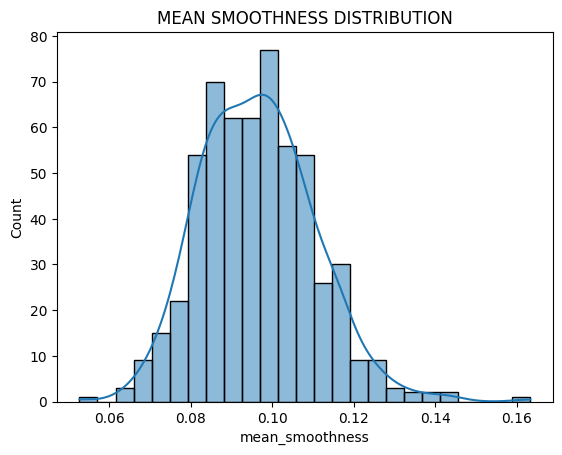

In [15]:
sns.histplot(x=df['mean_smoothness'],data=df,kde=True)
plt.title("MEAN SMOOTHNESS DISTRIBUTION")


Text(0.5, 1.0, 'mean radius distribution')

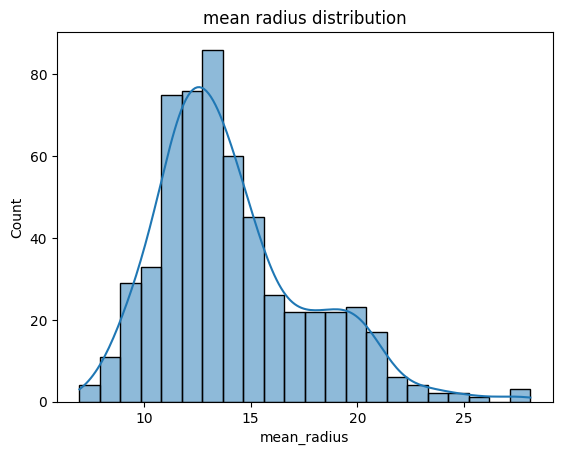

In [16]:
sns.histplot(x=df['mean_radius'],data=df,kde=True)
plt.title("mean radius distribution")

Text(0.5, 1.0, 'DIAGNOSIS COUNT OF CANCER PATIENTS')

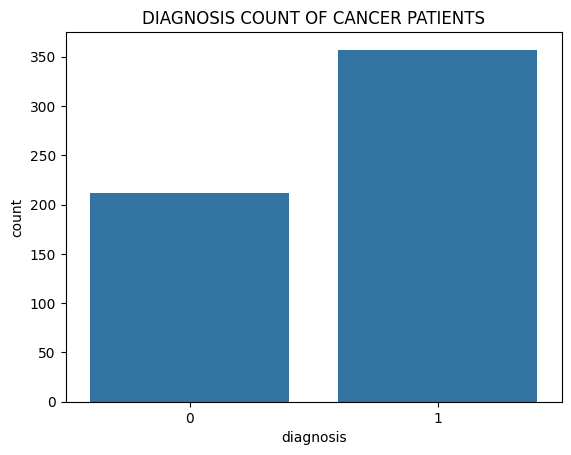

In [18]:
sns.countplot(x=df['diagnosis'],data=df)
plt.title("DIAGNOSIS COUNT OF CANCER PATIENTS")

Text(0.5, 1.0, 'RELATIONSHIP BTW Smoothness AND MEAN RADIYS')

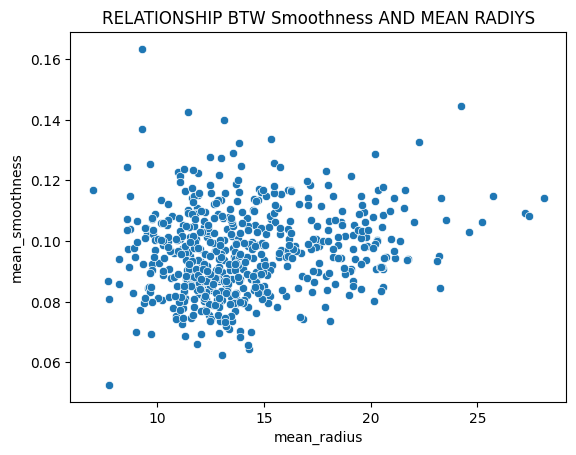

In [20]:
sns.scatterplot(x=df['mean_radius'],y=df['mean_smoothness'],data=df)
plt.title("RELATIONSHIP BTW Smoothness AND MEAN RADIYS")

<Axes: xlabel='mean_radius'>

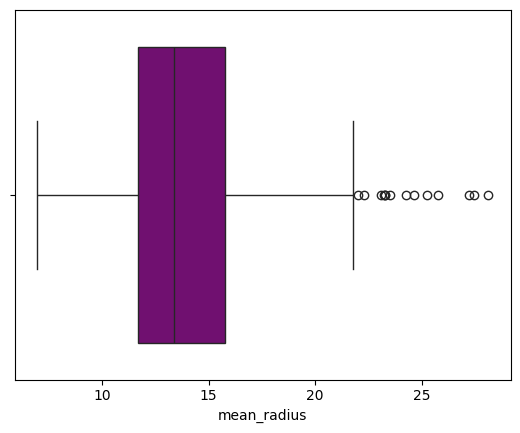

In [21]:
#DETECTING OUTLIERS IN DATASET
sns.boxplot(x=df['mean_radius'],data=df,color="purple")

In [23]:
nums_features=df.select_dtypes(np.number).columns.tolist()

In [24]:
nums_features

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'diagnosis']

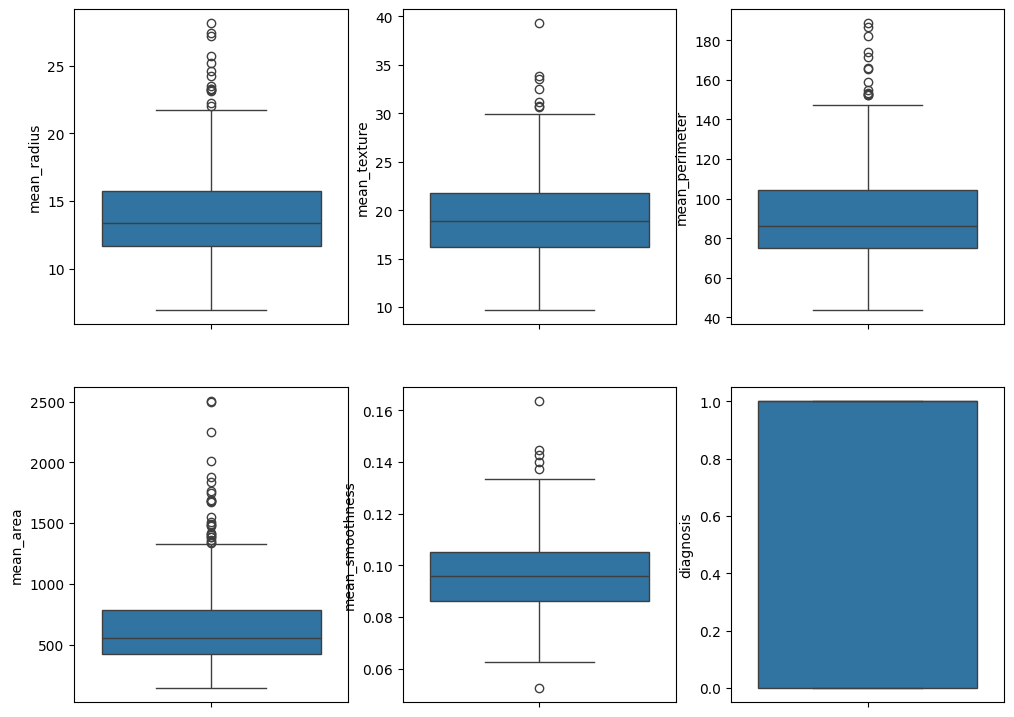

In [25]:
c=1
plt.figure(figsize=(12,9))
for n in nums_features:
    plt.subplot(2,3,c)
    sns.boxplot(df[n])
    c=c+1


REMOVING OUTLIERS FROM DATASET

In [ ]:
for col in nums_features:
    Q1 = df[col].quantile(0.25) #25 PERCENTAGFE QUARTILE
    Q3 = df[col].quantile(0.75) #75TH PERCEMTITLE
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR #LOWER FENCE
    upper_bound = Q3 + 1.5 * IQR #UPPER FENCW
    
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #FILTERINF OUT DATA

In [ ]:
df.shape #OUTLIERS ARE REMOVED

(507, 6)

In [30]:
df2=df.copy()

Text(0.5, 1.0, 'AFTER REMOVING OUTLIERS')

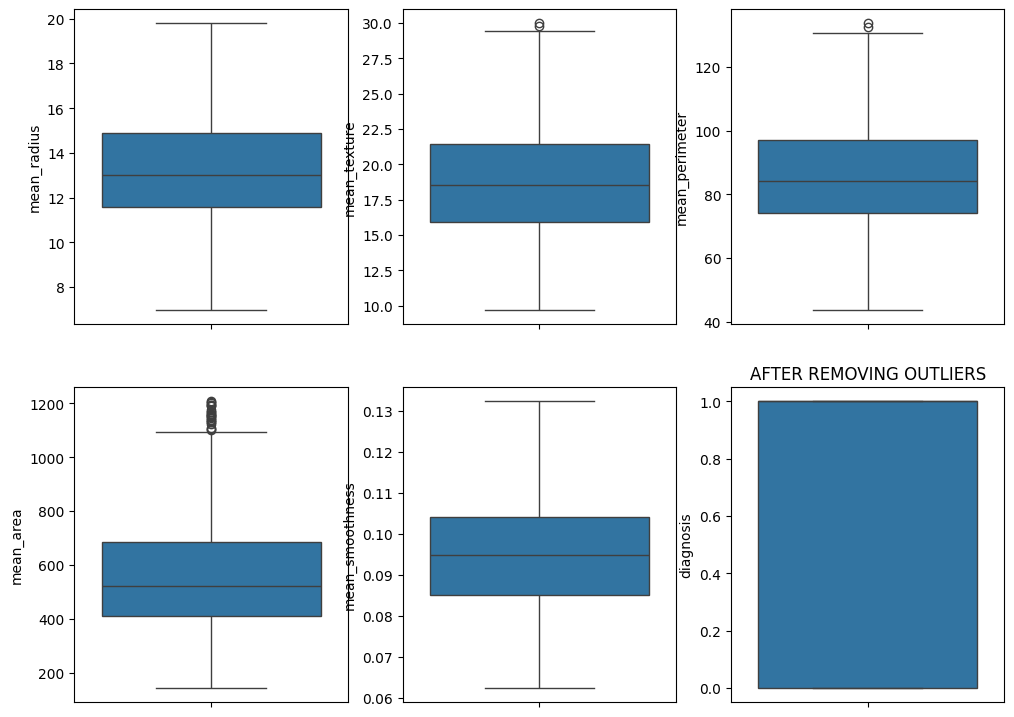

In [33]:
c=1
plt.figure(figsize=(12,9))
for n in nums_features:
    plt.subplot(2,3,c)
    sns.boxplot(df[n])
    c=c+1
plt.title("AFTER REMOVING OUTLIERS")

MACHINE LEARNING STARTS HERE

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.preprocessing import StandardScaler

Feature Scaling"

In [ ]:
std=StandardScaler() #MAKING AN OBJECT OF STANDARd scaler

In [38]:
df['mean_radius']=std.fit_transform(df[['mean_radius']])

In [40]:
df['mean_perimeter']=std.fit_transform(df[['mean_perimeter']])

In [41]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.725725,10.38,1.968454,1001.0,0.11840,0
2,2.365641,21.25,2.363732,1203.0,0.10960,0
5,-0.359646,15.70,-0.240162,477.1,0.12780,0
6,1.823595,19.98,1.792775,1040.0,0.09463,0
7,0.114644,20.83,0.178723,577.9,0.11890,0
...,...,...,...,...,...,...
558,0.445895,22.68,0.518552,657.1,0.08473,1
559,-0.713481,23.93,-0.682105,403.5,0.09261,1
560,0.242627,27.15,0.243505,600.4,0.09929,1
561,-0.830172,29.37,-0.893469,386.0,0.07449,1


In [42]:
df['mean_texture']=std.fit_transform(df[['mean_texture']])

In [43]:
df['mean_smoothness']=std.fit_transform(df[['mean_smoothness']])

In [44]:
df['mean_area']=std.fit_transform(df[['mean_area']])

In [45]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.725725,-2.135884,1.968454,1.806376,1.762402,0
2,2.365641,0.602429,2.363732,2.665631,1.090875,0
5,-0.359646,-0.795698,-0.240162,-0.422158,2.479715,0
6,1.823595,0.282497,1.792775,1.972272,-0.051484,0
7,0.114644,0.496625,0.178723,0.006619,1.800557,0
...,...,...,...,...,...,...
558,0.445895,0.962667,0.518552,0.343515,-0.806952,1
559,-0.713481,1.277560,-0.682105,-0.735233,-0.205630,1
560,0.242627,2.088725,0.243505,0.102328,0.304120,1
561,-0.830172,2.647976,-0.893469,-0.809674,-1.588366,1


SPLITTING THE DATA INTO TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,1:-1] #FEATURES COLUMNS

In [49]:
x

,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,-2.135884,1.968454,1.806376,1.762402
2,0.602429,2.363732,2.665631,1.090875
5,-0.795698,-0.240162,-0.422158,2.479715
6,0.282497,1.792775,1.972272,-0.051484
7,0.496625,0.178723,0.006619,1.800557
...,...,...,...,...
558,0.962667,0.518552,0.343515,-0.806952
559,1.277560,-0.682105,-0.735233,-0.205630
560,2.088725,0.243505,0.102328,0.304120
561,2.647976,-0.893469,-0.809674,-1.588366


In [50]:
y=df.iloc[:,-1]

In [52]:
y #TARHET COLUMN

0      0
2      0
5      0
6      0
7      0
      ..
558    1
559    1
560    1
561    1
566    0
Name: diagnosis, Length: 507, dtype: int64

In [53]:
df.shape

(507, 6)

In [54]:
df[dup].shape

C:\Users\tmrwi\AppData\Local\Temp\ipykernel_1968\2793828973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[dup].shape


(0, 6)

In [55]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [57]:
X_train

,mean_texture,mean_perimeter,mean_area,mean_smoothness
31,-0.039954,-0.494897,-0.577420,1.190078
10,1.103739,0.864969,0.942016,-1.010700
529,-1.365025,-0.500387,-0.557852,1.121399
118,1.020607,1.029669,0.877359,1.541103
42,1.499245,2.270402,2.244511,-0.342988
...,...,...,...,...
116,-0.780583,-1.548422,-1.408600,-0.052247
303,-0.062626,-1.102636,-1.029592,0.877207
391,-0.508515,-1.738924,-1.454966,0.655908
483,-0.306983,0.044768,-0.022307,0.320145


In [58]:
X_test

,mean_texture,mean_perimeter,mean_area,mean_smoothness
188,-0.369962,-0.640930,-0.627188,0.411717
307,-1.123187,-1.679083,-1.403921,-1.927181
548,0.121272,-1.421604,-1.236324,-0.793216
77,-0.682336,1.825714,1.827645,0.854314
502,-0.639510,-0.312630,-0.425561,1.563996
...,...,...,...,...
358,-0.848600,-1.658222,-1.426466,-0.944310
296,-1.639612,-0.977465,-0.904532,-0.772613
34,-0.246524,1.101038,0.982001,0.663539
293,-0.352328,-0.626107,-0.611024,-0.884025


    MODELLING

In [ ]:
lr=LogisticRegression() #LOGISTIC REGRESSION

In [60]:
lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [61]:
model=lr.fit(X_train,y_train)

In [62]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [63]:
predictions=model.predict(X_test)

In [64]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1])

EVAULUATING MODEL PERFORMANCE

In [66]:
from sklearn.metrics import accuracy_score,precision_score

In [67]:
acc=accuracy_score(y_test,predictions)

In [68]:
acc

0.9107142857142857

In [69]:
accuracy_per=acc*100
perc_score=precision_score(y_test,predictions)

In [70]:
perc_percentage=perc_score*100

In [73]:
print(f" accuracy of model is {accuracy_per}%")

 accuracy of model is 91.07142857142857%


In [72]:
perc_percentage

92.43697478991596

SAVING THE MODEL

In [74]:
import joblib

In [75]:
joblib.dump(model, "cancer_model.pkl")

['cancer_model.pkl']

In [76]:
x

,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,-2.135884,1.968454,1.806376,1.762402
2,0.602429,2.363732,2.665631,1.090875
5,-0.795698,-0.240162,-0.422158,2.479715
6,0.282497,1.792775,1.972272,-0.051484
7,0.496625,0.178723,0.006619,1.800557
...,...,...,...,...
558,0.962667,0.518552,0.343515,-0.806952
559,1.277560,-0.682105,-0.735233,-0.205630
560,2.088725,0.243505,0.102328,0.304120
561,2.647976,-0.893469,-0.809674,-1.588366
